<a href="https://colab.research.google.com/github/krupa2002/Deep_Learning_Krupa/blob/main/Image_Classification_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


In [31]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test ) = mnist.load_data()

In [4]:
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


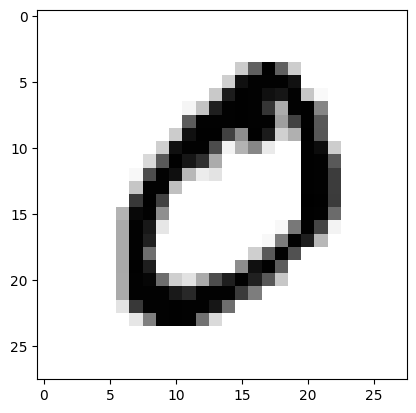

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[1], cmap='binary')
plt.show()

In [12]:
y_train[0]

np.uint8(5)

In [13]:
print(set(y_train))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


In [30]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [15]:
print("y_train encoded shape :", y_train_encoded.shape)
print("y_test encoded shape :", y_test_encoded.shape)

y_train encoded shape : (60000, 10)
y_test encoded shape : (10000, 10)


In [16]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [17]:
import numpy as np
x_train_reshaped = np.reshape(x_train, (60000, 28, 28, 1))
x_test_reshaped = np.reshape(x_test, (10000, 28, 28, 1))

In [29]:
print("x_train reshapes :", x_train_reshaped.shape)
print("x_test reshapes :", x_test_reshaped.shape)

x_train reshapes : (60000, 28, 28, 1)
x_test reshapes : (10000, 28, 28, 1)


In [76]:
print(x_train[0].shape)


(28, 28)


In [77]:
print(x_train[0].flatten()[:10])


[0 0 0 0 0 0 0 0 0 0]


In [79]:
print(x_train[0].reshape(28, 28))


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [24]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print("mean :", x_mean)
print("std :", x_std)

mean : 33.318421449829934
std : 78.56748998339798


In [25]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


In [35]:
print(set(x_train_norm[0].flatten()))

{np.float64(-0.38589016215482896), np.float64(1.306921966983251), np.float64(1.17964285952926), np.float64(1.803310486053816), np.float64(1.6887592893452241), np.float64(2.8215433456857437), np.float64(2.719720059722551), np.float64(1.1923707702746593), np.float64(1.7396709323268205), np.float64(2.057868700961798), np.float64(2.3633385588513764), np.float64(2.096052433197995), np.float64(1.7651267538176187), np.float64(2.7960875241949457), np.float64(2.7451758812133495), np.float64(2.45243393406917), np.float64(0.02140298169794222), np.float64(-0.22042732246464067), np.float64(1.2305545025108566), np.float64(0.2759611966059242), np.float64(2.210603629906587), np.float64(2.6560805059955555), np.float64(2.6051688630139593), np.float64(-0.4240738943910262), np.float64(0.4668798577869107), np.float64(0.1486820891519332), np.float64(0.3905123933145161), np.float64(1.0905474843114664), np.float64(-0.09314821501064967), np.float64(1.4851127174188385), np.float64(2.7579037919587486), np.float6

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [47]:
model = Sequential(
    [

    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu',input_shape = (784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(
    optimizer="sgd",
    loss = "categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(x_train_norm,y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8145 - loss: 0.6194
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9422 - loss: 0.1996
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9580 - loss: 0.1408


In [51]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1533
Test Loss: 0.12967140972614288
Test Accuracy: 95.99999785423279


In [52]:
predicts = model.predict(x_test_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [54]:
print(predicts.shape)

(10000, 10)


In [65]:
print("Type of predicts before loop:", type(predicts))
print("Shape of predicts before loop:", getattr(predicts, "shape", "No shape"))


Type of predicts before loop: <class 'numpy.int64'>
Shape of predicts before loop: ()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Type of predicts: <class 'numpy.ndarray'>


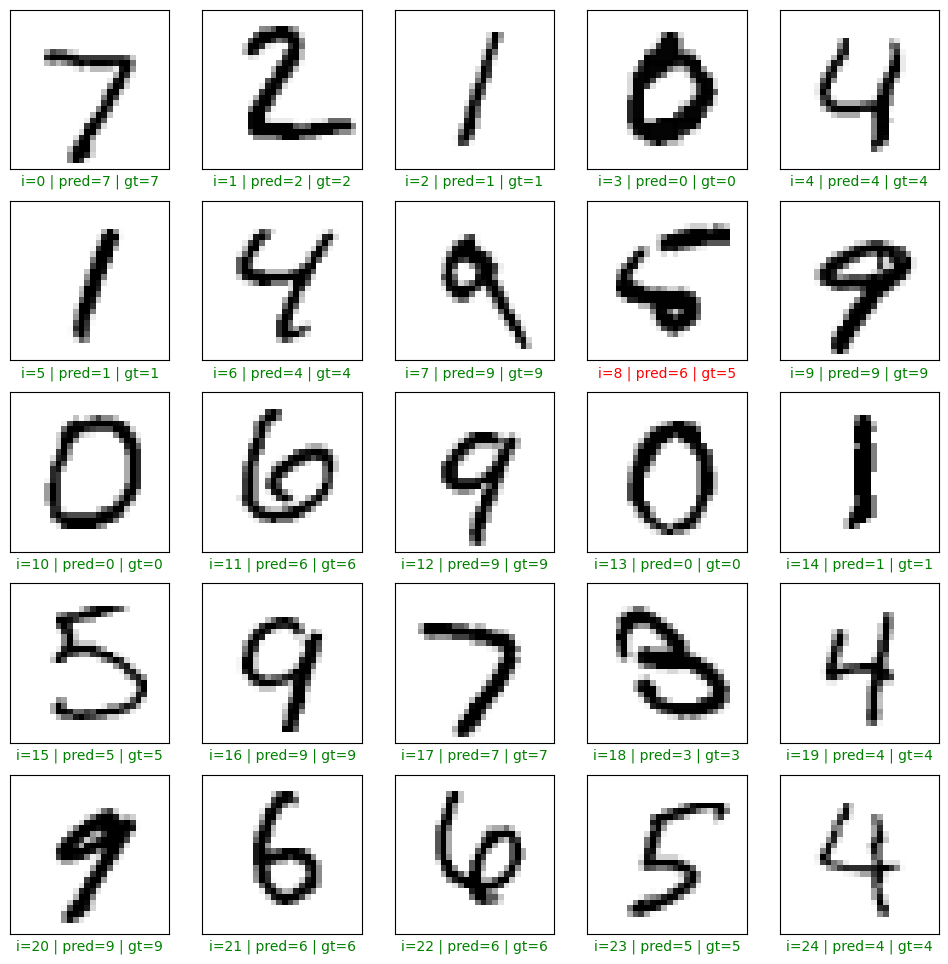

In [69]:
# Reapply the prediction to `predicts`
predicts = model.predict(x_test_norm)

# Verify the type of `predicts`
print("Type of predicts:", type(predicts))

plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Use 'predicts' instead of 'predict_probs' to access predictions
    prediction = np.argmax(predicts[start_index + i])
    gt = y_test[start_index + i]

    col = "g" if prediction == gt else "r"
    plt.xlabel(f"i={start_index + i} | pred={prediction} | gt={gt}", color=col)
    plt.imshow(x_test[start_index + i], cmap="binary")

plt.show()

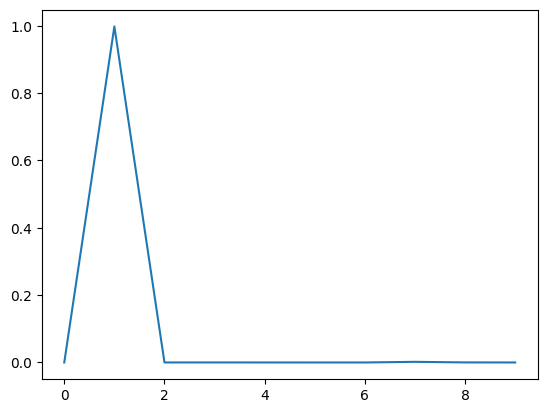

In [75]:
plt.plot(predicts[5])
plt.show()